# Visualize task fMRI activation maps (and RDMs)

In [21]:
import numpy as np
import nibabel as nib
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import hcp_utils as hcp
import tools
import nilearn.plotting as plotting
from importlib import reload
tools = reload(tools)
import wbplot
import matplotlib.image as img 

#### Set up basic parameters

In [22]:
basedir = '/home/ti236/taku/multiTaskVAE/'
networkdef = np.loadtxt('/home/ti236/AnalysisTools/ColeAnticevicNetPartition/cortex_parcel_network_assignments.txt')
# need to subtract one to make it compatible for python indices
indsort = np.loadtxt('/home/ti236/AnalysisTools/ColeAnticevicNetPartition/cortex_community_order.txt',dtype=int) - 1 
indsort.shape = (len(indsort),1)

# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()

xticks = {}
reorderednetworkaffil = networkdef[indsort]
for net in networks:
    netNum = networkmappings[net]
    netind = np.where(reorderednetworkaffil==netNum)[0]
    tick = np.max(netind)
    xticks[tick] = net

## General parameters/variables
nParcels = 360

sortednets = np.sort(list(xticks.keys()))
orderednetworks = []
for net in sortednets: orderednetworks.append(xticks[net])
    
networkpalette = ['royalblue','slateblue','paleturquoise','darkorchid','limegreen',
                  'lightseagreen','yellow','orchid','r','peru','orange','olivedrab']
networkpalette = np.asarray(networkpalette)

OrderedNetworks = ['VIS1','VIS2','SMN','CON','DAN','LAN','FPN','AUD','DMN','PMM','VMM','ORA']

glasserfilename = '/home/ti236/AnalysisTools/Q1-Q6_RelatedParcellation210.LR.CorticalAreas_dil_Colors.32k_fs_RL.dlabel.nii'
glasser = np.squeeze(nib.load(glasserfilename).get_data())

<ipython-input-22-99fc1fb6dc67>:34: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  glasser = np.squeeze(nib.load(glasserfilename).get_data())


In [23]:
# subIDs=['02','03','04','06','08','09','10','12','14','15','18','20','22','25','27','29','31','17','19','21','24','26','28','30']
subIDs=['02','03','04','06','08','09','10','12','14','15','18','20','22','25','27','29','31','17','19','21','24','26']#,'28','30']
sessIDs = ['a1','a2','b1','b2']
runs = range(1,9)

## Plot parcellated data

#### Load in parcellated data

In [25]:
tools=reload(tools)
data = []
task_index = []
for sub in subIDs:
    for sess in sessIDs:
        session = sub + '_' + sess
        for run in runs:
            tmpdat, tmpind = tools.loadTaskActivations(session,run,space='parcellated',model='betaseries')
            data.extend(tmpdat.T)
            task_index.extend(tmpind)
            

#### Identify unique task conditions, and generate activation maps for each condition

In [26]:
task_index = np.asarray(task_index)
data = np.asarray(data)

unique_tasks = np.unique(task_index)

data_task = []
for task in unique_tasks:
    task_ind = np.where(task_index==task)[0]
    data_task.append(stats.ttest_1samp(data[task_ind,:],0,axis=0)[0])
    
data_task = np.asarray(data_task).T
    

#### Plot to surface using wbplot

In [27]:
figuredir = basedir + 'docs/figures/task_activation_maps/'
vmin = -25
vmax = 25
i = 0
for task in unique_tasks:
    #flip hemispheres for parcellated data
    tmp = np.hstack((data_task[180:,i],data_task[:180,i]))
    wbplot.pscalar(figuredir + 'Parcellated' + task + '_BetaSeries.png',tmp,vrange=(vmin,vmax),cmap='bwr')
    i += 1

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

#### Visualize

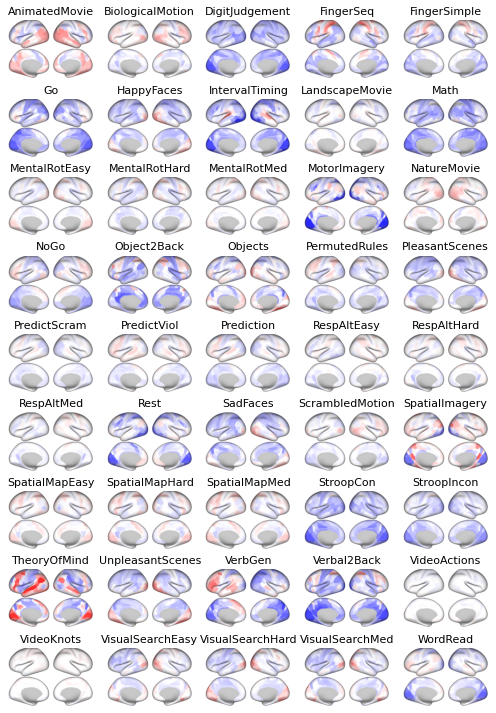

In [62]:
plt.figure(figsize=(7,10))
i = 1
for task in unique_tasks:
    im = img.imread(figuredir + 'Parcellated' + task + '.png') 
    plt.subplot(9,5,i)
    plt.imshow(im)
    plt.axis('off')
    plt.title(task,fontsize=11)
    i += 1
plt.tight_layout()
plt.savefig(figuredir + 'ParcellatedAllTasks.png',dpi=300)

## Plot vertex-wise data

#### Load in parcellated data

In [54]:
data_64k = []
task_index = []
for sub in subIDs:
    for sess in sessIDs:
        session = sub + '_' + sess
        for run in runs:
            tmpdat, tmpind = tools.loadTaskActivations(session,run,space='vertex')
            data_64k.extend(tmpdat.T)
            task_index.extend(tmpind)
            

#### Identify unique task conditions, and generate activation maps for each condition

In [55]:
task_index = np.asarray(task_index)
data_64k = np.asarray(data_64k)

unique_tasks = np.unique(task_index)

data_task_64k = []
for task in unique_tasks:
    task_ind = np.where(task_index==task)[0]
    data_task_64k.append(stats.ttest_1samp(data_64k[task_ind,:],0,axis=0)[0])
    
data_task_64k = np.asarray(data_task_64k).T
    

#### Plot to surface using wbplot

In [61]:
help(wbplot.dscalar)

Help on function dscalar in module wbplot.wbplot:

dscalar(file_out, dscalars, orientation='landscape', hemisphere=None, palette='magma', transparent=False, palette_params=None)
    Save an image of dense scalars using Connnectome Workbench.
    
    Parameters
    ----------
    file_out : str
        absolute path to filename where image is saved. if `filename` has an
        extension, it must be .png, e.g. fout="/Users/jbb/Desktop/test.png"
    dscalars : numpy.ndarray
        dense scalar values
    orientation : 'portrait' or 'landscape', default 'landscape'
        orientation of the output image. if hemisphere is None (i.e., if data
        are bilateral), this argument is ignored.
    hemisphere : 'left' or 'right' or None, default None
    palette : str, default 'magma'
        name of color palette
    transparent : bool, default False
        make all white pixels in resultant image transparent
    palette_params : dict or None, default None
        additional (key: value) 

In [67]:
figuredir = basedir + 'docs/figures/task_activation_maps/'
i = 0
for task in unique_tasks:
    wbplot.dscalar(figuredir + 'Vertex' + task + '.png',data_task_64k[:59412,i],palette='RedWhiteBlue')
    i += 1

#### Visualize - note that all maps are not scaled accordingly

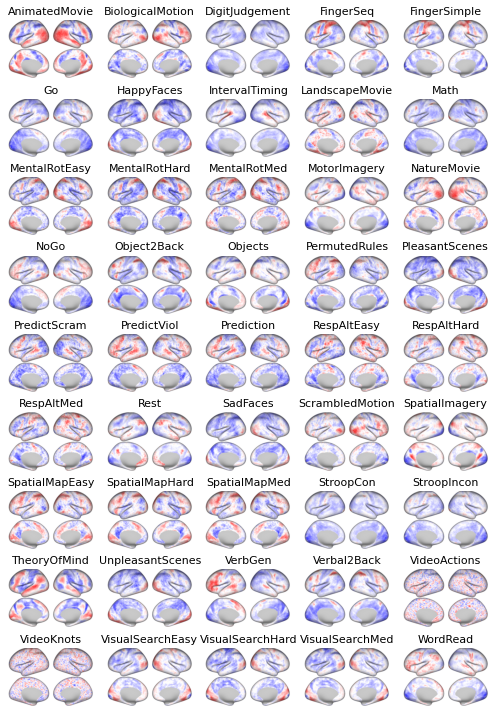

In [68]:
plt.figure(figsize=(7,10))
i = 1
for task in unique_tasks:
    im = img.imread(figuredir + 'Vertex' + task + '.png') 
    plt.subplot(9,5,i)
    plt.imshow(im)
    plt.axis('off')
    plt.title(task,fontsize=11)
    i += 1
plt.tight_layout()
plt.savefig(figuredir + 'VertexAllTasks.png',dpi=300)